In [277]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/jumpingdino/german-credit-dataset/german_credit_data.csv


In [278]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [279]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)

numpy 2.0.2
pandas 2.2.2
sklearn 1.6.1


In [280]:
df = pd.read_csv('/kaggle/input/datasets/jumpingdino/german-credit-dataset/german_credit_data.csv')

In [281]:
df.head()

,status_account,month_duration,credit_history,purpose,credit_amount,status_savings,years_employment,payment_to_income_ratio,status_and_sex,secondary_obligor,...,collateral,age,other_installment_plans,housing,n_credits,job,n_guarantors,telephone,is_foreign_worker,target
0,< 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,>= 7 years,4,male : single,none,...,none,67,none,own,2,skilled employee/ official,1,"yes, registered under the customers name",yes,good
1,0 to < 200 DM,48,existing credits paid back duly till now,radio/television,5951,< 100 DM,1 to < 4 years,2,female : divorced/separated/married,none,...,none,22,none,own,1,skilled employee/ official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,< 100 DM,4 to < 7 years,2,male : single,none,...,none,49,none,own,1,unskilled - resident,2,none,yes,good
3,< 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,< 100 DM,4 to < 7 years,2,male : single,guarantor,...,car,45,none,for free,1,skilled employee/ official,2,none,yes,good
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 to < 4 years,3,male : single,none,...,savings agreement/life insurance,53,none,for free,2,skilled employee/ official,2,none,yes,bad


In [282]:
df.shape


(1000, 21)

In [283]:
df.drop(columns=['purpose','status_account','secondary_obligor','collateral','other_installment_plans','telephone'],inplace=True)

In [284]:
print(df['status_and_sex'].unique())


['male : single' 'female : divorced/separated/married'
 'male : divorced/separated' 'male : married/widowed']


In [285]:

df[['sex', 'status']] = df['status_and_sex'].str.split(' : ', expand=True)

df.drop('status_and_sex', axis=1, inplace=True)

print(df[['sex','status']].head())


      sex                      status
0    male                      single
1  female  divorced/separated/married
2    male                      single
3    male                      single
4    male                      single


In [286]:
df.head()

,month_duration,credit_history,credit_amount,status_savings,years_employment,payment_to_income_ratio,residence_since,age,housing,n_credits,job,n_guarantors,is_foreign_worker,target,sex,status
0,6,critical account/ other credits existing (not ...,1169,unknown/ no savings account,>= 7 years,4,4,67,own,2,skilled employee/ official,1,yes,good,male,single
1,48,existing credits paid back duly till now,5951,< 100 DM,1 to < 4 years,2,2,22,own,1,skilled employee/ official,1,yes,bad,female,divorced/separated/married
2,12,critical account/ other credits existing (not ...,2096,< 100 DM,4 to < 7 years,2,3,49,own,1,unskilled - resident,2,yes,good,male,single
3,42,existing credits paid back duly till now,7882,< 100 DM,4 to < 7 years,2,4,45,for free,1,skilled employee/ official,2,yes,good,male,single
4,24,delay in paying off in the past,4870,< 100 DM,1 to < 4 years,3,4,53,for free,2,skilled employee/ official,2,yes,bad,male,single


In [287]:
def clean_status(x):
    if 'single' in x:
        return 'single'
    elif 'married' in x:
        return 'married'
    else:
        return 'divorced/separated'

df['status'] = df['status'].apply(clean_status)


In [288]:
df.head()

,month_duration,credit_history,credit_amount,status_savings,years_employment,payment_to_income_ratio,residence_since,age,housing,n_credits,job,n_guarantors,is_foreign_worker,target,sex,status
0,6,critical account/ other credits existing (not ...,1169,unknown/ no savings account,>= 7 years,4,4,67,own,2,skilled employee/ official,1,yes,good,male,single
1,48,existing credits paid back duly till now,5951,< 100 DM,1 to < 4 years,2,2,22,own,1,skilled employee/ official,1,yes,bad,female,married
2,12,critical account/ other credits existing (not ...,2096,< 100 DM,4 to < 7 years,2,3,49,own,1,unskilled - resident,2,yes,good,male,single
3,42,existing credits paid back duly till now,7882,< 100 DM,4 to < 7 years,2,4,45,for free,1,skilled employee/ official,2,yes,good,male,single
4,24,delay in paying off in the past,4870,< 100 DM,1 to < 4 years,3,4,53,for free,2,skilled employee/ official,2,yes,bad,male,single


In [289]:
print(df['status_savings'].unique())


['unknown/ no savings account' '< 100 DM' '500 to < 1000 DM' '>= 1000 DM'
 '100 to < 500 DM']


In [290]:
df['status_savings'] = df['status_savings'].str.strip()

mapping = {
    '< 100 DM': 0,
    '100 to < 500 DM': 1,
    '500 to < 1000 DM': 2,
    '>= 1000 DM': 3,
    'unknown/ no savings account': 4
}

df['status_savings'] = df['status_savings'].map(mapping)


In [291]:
print(df['status_savings'].unique())
print(df['status_savings'].isna().sum())


[4 0 2 3 1]
0


In [292]:
df.head()

,month_duration,credit_history,credit_amount,status_savings,years_employment,payment_to_income_ratio,residence_since,age,housing,n_credits,job,n_guarantors,is_foreign_worker,target,sex,status
0,6,critical account/ other credits existing (not ...,1169,4,>= 7 years,4,4,67,own,2,skilled employee/ official,1,yes,good,male,single
1,48,existing credits paid back duly till now,5951,0,1 to < 4 years,2,2,22,own,1,skilled employee/ official,1,yes,bad,female,married
2,12,critical account/ other credits existing (not ...,2096,0,4 to < 7 years,2,3,49,own,1,unskilled - resident,2,yes,good,male,single
3,42,existing credits paid back duly till now,7882,0,4 to < 7 years,2,4,45,for free,1,skilled employee/ official,2,yes,good,male,single
4,24,delay in paying off in the past,4870,0,1 to < 4 years,3,4,53,for free,2,skilled employee/ official,2,yes,bad,male,single


In [293]:
print(df['credit_history'].unique())

['critical account/ other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/ all credits paid back duly'
 'all credits at this bank paid back duly']


In [294]:
df['credit_history'] = df['credit_history'].str.strip()

mapping = {
    'critical account/ other credits existing (not at this bank)': 0,
    'delay in paying off in the past': 1,
    'existing credits paid back duly till now': 2,
    'all credits at this bank paid back duly': 3,
    'no credits taken/ all credits paid back duly': 4
}

df['credit_history'] = df['credit_history'].map(mapping)


In [295]:
print(df['credit_history'].unique())
print(df['credit_history'].isna().sum())


[0 2 1 4 3]
0


In [296]:
df.head()

,month_duration,credit_history,credit_amount,status_savings,years_employment,payment_to_income_ratio,residence_since,age,housing,n_credits,job,n_guarantors,is_foreign_worker,target,sex,status
0,6,0,1169,4,>= 7 years,4,4,67,own,2,skilled employee/ official,1,yes,good,male,single
1,48,2,5951,0,1 to < 4 years,2,2,22,own,1,skilled employee/ official,1,yes,bad,female,married
2,12,0,2096,0,4 to < 7 years,2,3,49,own,1,unskilled - resident,2,yes,good,male,single
3,42,2,7882,0,4 to < 7 years,2,4,45,for free,1,skilled employee/ official,2,yes,good,male,single
4,24,1,4870,0,1 to < 4 years,3,4,53,for free,2,skilled employee/ official,2,yes,bad,male,single


In [297]:
print(df['years_employment'].unique())

['>= 7 years' '1 to < 4 years' '4 to < 7 years' 'unemployed' '< 1 year']


In [298]:
df['years_employment'] = df['years_employment'].str.strip()

mapping = {
    'unemployed': 0,
    '< 1 year': 1,
    '1 to < 4 years': 2,
    '4 to < 7 years': 3,
    '>= 7 years': 4
}

df['years_employment'] = df['years_employment'].map(mapping)


In [299]:
df.head()

,month_duration,credit_history,credit_amount,status_savings,years_employment,payment_to_income_ratio,residence_since,age,housing,n_credits,job,n_guarantors,is_foreign_worker,target,sex,status
0,6,0,1169,4,4,4,4,67,own,2,skilled employee/ official,1,yes,good,male,single
1,48,2,5951,0,2,2,2,22,own,1,skilled employee/ official,1,yes,bad,female,married
2,12,0,2096,0,3,2,3,49,own,1,unskilled - resident,2,yes,good,male,single
3,42,2,7882,0,3,2,4,45,for free,1,skilled employee/ official,2,yes,good,male,single
4,24,1,4870,0,2,3,4,53,for free,2,skilled employee/ official,2,yes,bad,male,single


In [300]:
print(df['job'].unique())

['skilled employee/ official' 'unskilled - resident'
 'management/ self-employed/highly qualified employee'
 'unemployed/ unskilled - non-resident']


In [301]:
df['job'] = df['job'].str.strip()

mapping = {
    'unemployed/ unskilled - non-resident': 0,
    'unskilled - resident': 1,
    'skilled employee/ official': 2,
    'management/ self-employed/highly qualified employee': 3
}

df['job'] = df['job'].map(mapping)


In [302]:
df.head()

,month_duration,credit_history,credit_amount,status_savings,years_employment,payment_to_income_ratio,residence_since,age,housing,n_credits,job,n_guarantors,is_foreign_worker,target,sex,status
0,6,0,1169,4,4,4,4,67,own,2,2,1,yes,good,male,single
1,48,2,5951,0,2,2,2,22,own,1,2,1,yes,bad,female,married
2,12,0,2096,0,3,2,3,49,own,1,1,2,yes,good,male,single
3,42,2,7882,0,3,2,4,45,for free,1,2,2,yes,good,male,single
4,24,1,4870,0,2,3,4,53,for free,2,2,2,yes,bad,male,single


In [303]:
print(df['housing'].unique())

['own' 'for free' 'rent']


In [304]:
df = pd.get_dummies(df, columns=['housing'], prefix='housing', drop_first=True)


In [305]:
df.head()

,month_duration,credit_history,credit_amount,status_savings,years_employment,payment_to_income_ratio,residence_since,age,n_credits,job,n_guarantors,is_foreign_worker,target,sex,status,housing_own,housing_rent
0,6,0,1169,4,4,4,4,67,2,2,1,yes,good,male,single,True,False
1,48,2,5951,0,2,2,2,22,1,2,1,yes,bad,female,married,True,False
2,12,0,2096,0,3,2,3,49,1,1,2,yes,good,male,single,True,False
3,42,2,7882,0,3,2,4,45,1,2,2,yes,good,male,single,False,False
4,24,1,4870,0,2,3,4,53,2,2,2,yes,bad,male,single,False,False


In [306]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: Index(['month_duration', 'credit_history', 'credit_amount', 'status_savings',
       'years_employment', 'payment_to_income_ratio', 'residence_since', 'age',
       'n_credits', 'job', 'n_guarantors'],
      dtype='object')
Categorical columns: Index(['is_foreign_worker', 'target', 'sex', 'status'], dtype='object')


In [307]:
print(df.isnull().sum())

month_duration             0
credit_history             0
credit_amount              0
status_savings             0
years_employment           0
payment_to_income_ratio    0
residence_since            0
age                        0
n_credits                  0
job                        0
n_guarantors               0
is_foreign_worker          0
target                     0
sex                        0
status                     0
housing_own                0
housing_rent               0
dtype: int64


In [308]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['target']),
                                                 df['target'],
                                                 test_size=0.2,
                                                random_state=42)
X_train.head()

,month_duration,credit_history,credit_amount,status_savings,years_employment,payment_to_income_ratio,residence_since,age,n_credits,job,n_guarantors,is_foreign_worker,sex,status,housing_own,housing_rent
29,60,1,6836,0,4,3,4,63,2,2,1,yes,male,single,True,False
535,21,0,2319,0,1,2,1,33,1,2,1,yes,male,divorced/separated,False,True
695,6,2,1236,2,2,2,4,50,1,2,1,yes,male,single,False,True
557,21,4,5003,4,2,1,4,29,2,2,1,yes,female,married,True,False
836,12,2,886,4,2,4,2,21,1,2,1,yes,female,married,True,False


In [309]:
trf1 = ColumnTransformer([
    ('ohe_is_foreign_worker', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [11]),
    ('ohe_sex', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [12]),
    ('ohe_status', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [13])
], remainder='passthrough')

In [310]:
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,14))
])

In [311]:
trf3 = SelectKBest(score_func=chi2,k=13)

In [312]:
trf4 = DecisionTreeClassifier()



In [313]:
trf5 = LogisticRegression()



In [314]:
trf6 = RandomForestClassifier()



In [315]:
trf7 = XGBClassifier()

In [316]:
pipe1 = make_pipeline(trf1,trf2,trf3,trf4)
pipe2 = make_pipeline(trf1,trf2,trf3,trf5)
pipe3 =make_pipeline(trf1,trf2,trf3,trf6)
pipe4 =make_pipeline(trf1,trf2,trf3,trf7)

In [317]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [318]:
pipe1.fit(X_train,y_train)
pipe2.fit(X_train,y_train)
pipe3.fit(X_train,y_train)
pipe4.fit(X_train,y_train)


Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_is_foreign_worker',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [11]),
                                                 ('ohe_sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [12]),
                                                 ('ohe_status',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [13])])),
                ('colum...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [319]:
y_pred1 = pipe1.predict(X_test)
y_pred2 = pipe2.predict(X_test)
y_pred3 = pipe3.predict(X_test)
y_pred4 = pipe4.predict(X_test)

from sklearn.metrics import accuracy_score

print("Decision Tree:", accuracy_score(y_test, y_pred1))
print("Logistic Regression:", accuracy_score(y_test, y_pred2))
print("Random Forest:", accuracy_score(y_test, y_pred3))
print("XGBoost:", accuracy_score(y_test, y_pred4))



Decision Tree: 0.63
Logistic Regression: 0.765
Random Forest: 0.74
XGBoost: 0.735


In [320]:
pd_values = pipe2.predict_proba(X_test)[:, 1]
print(pd_values)


[0.60650988 0.69450066 0.68357963 0.66280746 0.74021577 0.67045847
 0.78359724 0.72120701 0.91577852 0.79649348 0.73948982 0.41910589
 0.64256067 0.36654171 0.31291956 0.69784013 0.93066348 0.67180468
 0.72201508 0.8085278  0.83812016 0.74990566 0.84065831 0.91784905
 0.95687555 0.52990004 0.56536356 0.17444928 0.87784688 0.76941419
 0.81634839 0.66369183 0.84479397 0.89517649 0.71457466 0.82527598
 0.73769204 0.80470844 0.85992607 0.5102694  0.56378897 0.8946655
 0.52114847 0.64718651 0.91209585 0.85612778 0.3268448  0.59740932
 0.43791552 0.73718806 0.42355439 0.90438112 0.57247138 0.54259585
 0.86755672 0.72646141 0.90514746 0.58665816 0.76327841 0.66615656
 0.80130902 0.70371716 0.75594248 0.93341556 0.54598857 0.69972001
 0.68882219 0.47585961 0.45749727 0.71825602 0.73000974 0.89809522
 0.80106105 0.59921973 0.77339267 0.61416046 0.67182866 0.7126142
 0.89119615 0.63708829 0.54766954 0.6222678  0.79978996 0.75679749
 0.84402915 0.47687882 0.48026486 0.22771286 0.63175226 0.688441

In [321]:
risk_score = (1- pd_values)* 100

def risk_category(score):
    if score >= 70:
        return "Low Risk"
    elif score >= 40:
        return "Medium Risk"
    else:
        return "High Risk"

risk_categories = [risk_category(score) for score in risk_score]


In [322]:
import pandas as pd

results = pd.DataFrame({
    "PD": pd_values,
    "Risk Score": risk_score,
    "Risk Category": risk_categories
})

print(results)


           PD  Risk Score Risk Category
0    0.606510   39.349012     High Risk
1    0.694501   30.549934     High Risk
2    0.683580   31.642037     High Risk
3    0.662807   33.719254     High Risk
4    0.740216   25.978423     High Risk
..        ...         ...           ...
195  0.665296   33.470358     High Risk
196  0.215661   78.433899      Low Risk
197  0.548448   45.155180   Medium Risk
198  0.707434   29.256571     High Risk
199  0.389355   61.064488   Medium Risk

[200 rows x 3 columns]


In [324]:
print(pipe2.named_steps)


{'columntransformer-1': ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_is_foreign_worker',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 [11]),
                                ('ohe_sex',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 [12]),
                                ('ohe_status',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 [13])]), 'columntransformer-2': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 14, None))]), 'selectkbest': SelectKBest(k=13, score_func=<function chi2 at 0x7d35541f4b80>), 'logisticregression': LogisticRegression()}


In [327]:

ct = pipe2.named_steps['columntransformer-1']


ohe_features_worker = ct.named_transformers_['ohe_is_foreign_worker'].get_feature_names_out(['is_foreign_worker'])
ohe_features_sex = ct.named_transformers_['ohe_sex'].get_feature_names_out(['sex'])
ohe_features_status = ct.named_transformers_['ohe_status'].get_feature_names_out(['status'])
ohe_features = list(ohe_features_worker) + list(ohe_features_sex) + list(ohe_features_status)


numeric_features = [col for col in X_customer.columns if col not in ['is_foreign_worker','sex','status']]
all_features = ohe_features + numeric_features


selected_mask = pipe2.named_steps['selectkbest'].get_support()
selected_features = [f for f, keep in zip(all_features, selected_mask) if keep]


X_test_processed = pipe2[:-1].transform(X_test)

import shap
masker = shap.maskers.Independent(X_test_processed)
explainer = shap.LinearExplainer(pipe2.named_steps['logisticregression'], masker=masker)
shap_values = explainer(X_test_processed)


i = 0
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values.values[i],
    X_test_processed[i],
    feature_names=selected_features
)


              PD  Risk Score
sex                         
female  0.667710   33.229049
male    0.722416   27.758392
Risk Category  High Risk  Low Risk  Medium Risk
sex                                            
female                38         1           17
male                 116         4           24
T-test for PD between genders:
t-statistic: 2.1322306239267337 p-value: 0.03421993759547626


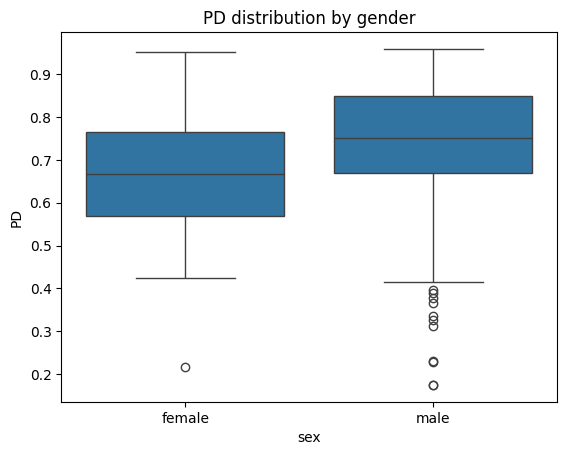

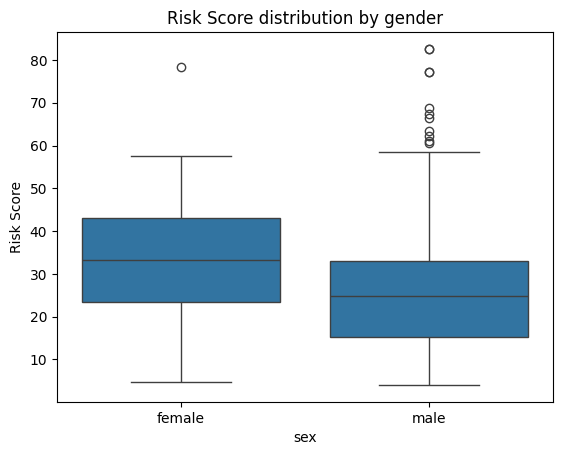

In [330]:
import pandas as pd


X_test_copy = X_test.copy()
X_test_copy['PD'] = pipe2.predict_proba(X_test)[:,1]
X_test_copy['Risk Score'] = (1 - X_test_copy['PD'])*100


def risk_category(score):
    if score >= 70:
        return 'Low Risk'
    elif score >= 40:
        return 'Medium Risk'
    else:
        return 'High Risk'

X_test_copy['Risk Category'] = X_test_copy['Risk Score'].apply(risk_category)


gender_summary = X_test_copy.groupby('sex')[['PD','Risk Score']].mean()
print(gender_summary)


risk_counts = pd.crosstab(X_test_copy['sex'], X_test_copy['Risk Category'])
print(risk_counts)

from scipy.stats import ttest_ind

male_scores = X_test_copy[X_test_copy['sex']=='male']['PD']
female_scores = X_test_copy[X_test_copy['sex']=='female']['PD']

t_stat, p_val = ttest_ind(male_scores, female_scores)
print("T-test for PD between genders:")
print("t-statistic:", t_stat, "p-value:", p_val)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='sex', y='PD', data=X_test_copy)
plt.title("PD distribution by gender")
plt.show()

sns.boxplot(x='sex', y='Risk Score', data=X_test_copy)
plt.title("Risk Score distribution by gender")
plt.show()
